In [1]:
library(classInt)
library(RColorBrewer)
library(grid)
library(rgdal)
library(ggplot2)

Loading required package: spData
To access larger datasets in this package, install the spDataLarge
package with: `install.packages('spDataLarge',
repos='https://nowosad.github.io/drat/', type='source'))`
Loading required package: sp
rgdal: version: 1.2-18, (SVN revision 718)
 Geospatial Data Abstraction Library extensions to R successfully loaded
 Loaded GDAL runtime: GDAL 2.1.3, released 2017/20/01
 Path to GDAL shared files: /Library/Frameworks/R.framework/Versions/3.4/Resources/library/rgdal/gdal
 GDAL binary built with GEOS: FALSE 
 Loaded PROJ.4 runtime: Rel. 4.9.3, 15 August 2016, [PJ_VERSION: 493]
 Path to PROJ.4 shared files: /Library/Frameworks/R.framework/Versions/3.4/Resources/library/rgdal/proj
 Linking to sp version: 1.2-7 


In [2]:
ROOT <- '/Users/dongmeichen/Documents/beetle'
DATA <- sprintf('%s/data', ROOT)
data <- read.csv(sprintf('%s/mpb10km_data_wo_FIA.csv', DATA))
results <- read.csv(sprintf('%s/gwr_results_wo_FIA_1.csv', DATA))
head(data)
head(results)

lon,lat,etopo1,beetleAcres,host,forest,mStdAge,density,vcc,mfri,⋯,Tmin,winterMin,summerTmean,Pmean,summerP1,minT,JanMin,TOctSep,Jan20,PcumOctSep
-124.1712,40.22942,365.1772,0.80,1,1,25.50000,58050.83,1,2,⋯,3.799283,-1.050936,13.39157,147.6052,24.63396,-1.142272,0.77218069,10.28896,0,3588.627
-124.0860,40.42007,493.0852,0.80,0,1,42.46217,52809.04,1,2,⋯,3.858750,-1.872970,14.15700,136.2772,25.59386,-1.986082,-0.02538966,10.65948,0,3310.186
-123.9379,40.25447,487.5240,0.80,1,1,169.82977,54385.98,1,2,⋯,3.853568,-2.322706,15.26891,131.7037,22.97331,-2.402099,-0.42077545,11.30121,0,3203.155
-123.9535,40.34353,350.6961,0.80,0,1,249.11995,47005.25,1,2,⋯,4.731104,-2.289419,15.96638,127.5623,21.96572,-2.376570,-0.38369531,12.05334,0,3101.846
-124.2945,42.21193,387.5008,2.10,1,1,102.39621,51167.16,3,2,⋯,3.569939,-1.609584,14.75741,144.9382,63.31930,-1.701227,0.26865842,10.65064,0,3508.975
-124.3114,42.30082,409.5534,331.05,1,1,83.12288,54697.57,3,2,⋯,2.772311,-1.861916,14.02822,145.8606,65.28476,-1.954968,0.04758294,9.89128,0,3531.298


sum.w,X.Intercept.,mStdAge,density,vcc,prs,vpd,summerP0,Tmean,wd,⋯,prs_se_EDF,vpd_se_EDF,summerP0_se_EDF,Tmean_se_EDF,wd_se_EDF,AugTmean_se_EDF,Tmin_se_EDF,pred.se.1,coord.x,coord.y
70.96779,0.6960072,2.415135e-04,-5.022362e-07,-0.002616344,0.003699193,8.684375e-07,0.010202620,0.10206971,-5.519813e-05,⋯,0.001405668,3.785528e-07,0.002886117,0.1306447,1.648262e-05,0.06649974,0.06443653,0.02599855,-990000,-460000
59.45395,0.5327839,2.369647e-04,-5.028680e-07,-0.002237511,0.005391623,1.158055e-06,0.012856800,0.14565936,-5.055573e-05,⋯,0.001711043,5.140840e-07,0.003957444,0.1706973,1.925789e-05,0.08708102,0.08336318,0.02934228,-980000,-440000
56.10082,0.8385982,2.182343e-04,-2.794766e-07,-0.013850243,0.004960935,1.280325e-06,0.010204909,0.09770818,-8.230611e-05,⋯,0.001652139,6.253929e-07,0.005913595,0.2145496,2.275818e-05,0.11037464,0.10226034,0.02810679,-970000,-460000
52.74002,0.6999624,2.140790e-04,-2.239486e-07,-0.012903890,0.005775726,1.310581e-06,0.011526078,0.13935531,-7.521971e-05,⋯,0.001797047,6.703917e-07,0.006006912,0.2210648,2.374000e-05,0.11357442,0.10575065,0.04120183,-970000,-450000
46.03581,1.5412444,-8.029014e-05,-3.491896e-08,0.001457399,-0.003069859,-7.228196e-07,-0.002605525,0.13767303,-2.427338e-05,⋯,0.002553274,6.022795e-07,0.002457129,0.1225256,2.607946e-05,0.06248275,0.06027019,0.03234978,-970000,-240000
46.48358,1.7945665,-9.815947e-05,2.052208e-07,0.001471118,-0.002777439,-7.353997e-07,-0.004009237,0.13435104,-3.086128e-05,⋯,0.002544869,6.284530e-07,0.002631734,0.1274769,2.685869e-05,0.06478093,0.06276975,0.03029844,-970000,-230000


In [3]:
xy <- read.csv(sprintf('%s/mpb10km_data_wo_FIA_xy.csv', DATA))

In [4]:
coeffs <- results[, colnames(results)[colnames(results) %in% colnames(data)]]

Warning message:
“Quick-TRANSfer stage steps exceeded maximum (= 381800)”

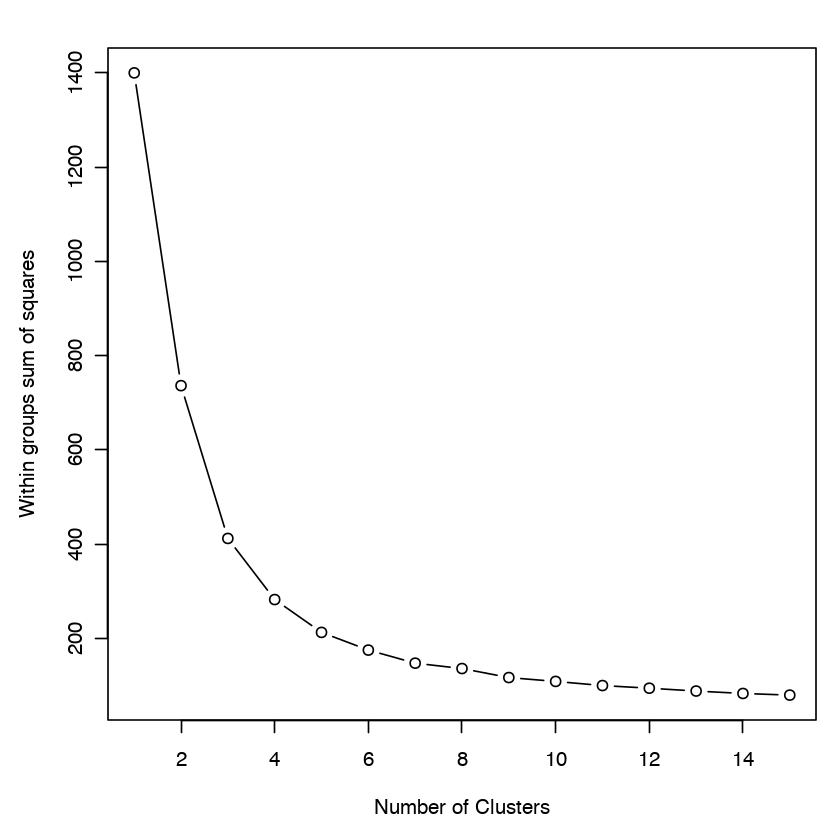

In [5]:
wss <- (nrow(coeffs)-1)*sum(apply(coeffs,2,var))
par(mfrow=c(1,1),mar=c(5,4.5,2,1))
for (i in 2:15) wss[i] <- sum(kmeans(coeffs, centers=i)$withinss)
plot(1:15, wss, type="b", xlab="Number of Clusters",
     ylab="Within groups sum of squares") 

In [6]:
ncluster <- 3
fit <- kmeans(coeffs, ncluster)
nclr <- ncluster
plotclr <- brewer.pal(nclr,"Set1")

In [7]:
mpb10km_poly <- readOGR(dsn='/Users/dongmeichen/Documents/beetle/shp', 
                           layer='mpb10km')
mpb_projstr <- "+proj=laea +lon_0=-112.5 +lat_0=45 +x_0=0 +y_0=0 +ellps=WGS84 +datum=WGS84 +units=m +no_defs"
proj4string(mpb10km_poly) <- mpb_projstr
mpb10km_lines <- fortify(mpb10km_poly, region="SP_ID")

OGR data source with driver: ESRI Shapefile 
Source: "/Users/dongmeichen/Documents/beetle/shp", layer: "mpb10km"
with 17 features
It has 2 fields


Warning message in ReplProj4string(obj, CRS(value)):
“A new CRS was assigned to an object with an existing CRS:
+proj=laea +lat_0=45 +lon_0=-112.5 +x_0=0 +y_0=0 +datum=WGS84 +units=m +no_defs +ellps=WGS84 +towgs84=0,0,0
without reprojecting.
For reprojection, use function spTransform”

In [8]:
data.gwr <- cbind(data, xy)

In [11]:
coef.vars <- colnames(coeffs)[!(colnames(coeffs) %in% c('host', 'forest'))]

In [12]:
coef.vars

[1] "mStdAge"  "density"  "vcc"      "prs"      "vpd"      "summerP0"
 [7] "Tmean"    "wd"       "AugTmean" "Tmin"

Warning message:
“Non Lab interpolation is deprecated”Warning message:
“Non Lab interpolation is deprecated”Warning message:
“Non Lab interpolation is deprecated”

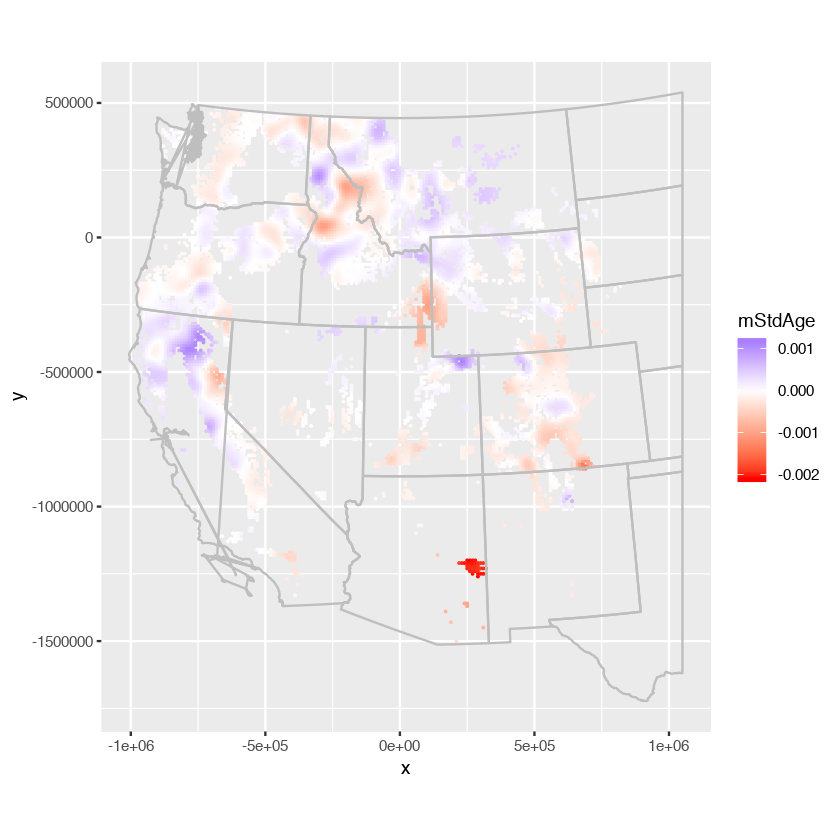

Warning message:
“Non Lab interpolation is deprecated”

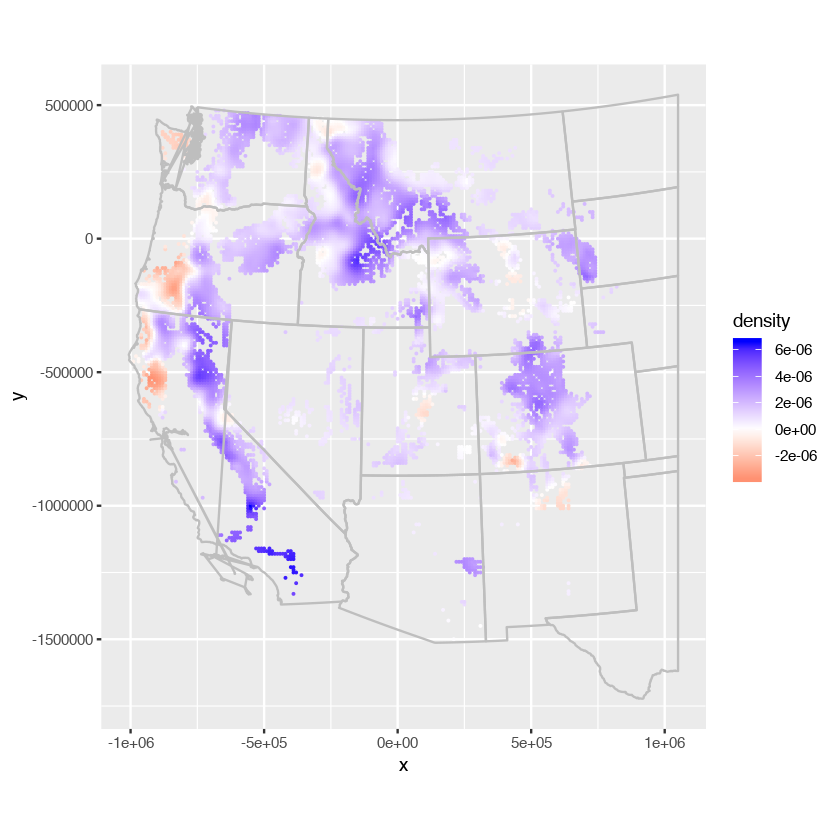

Warning message:
“Non Lab interpolation is deprecated”

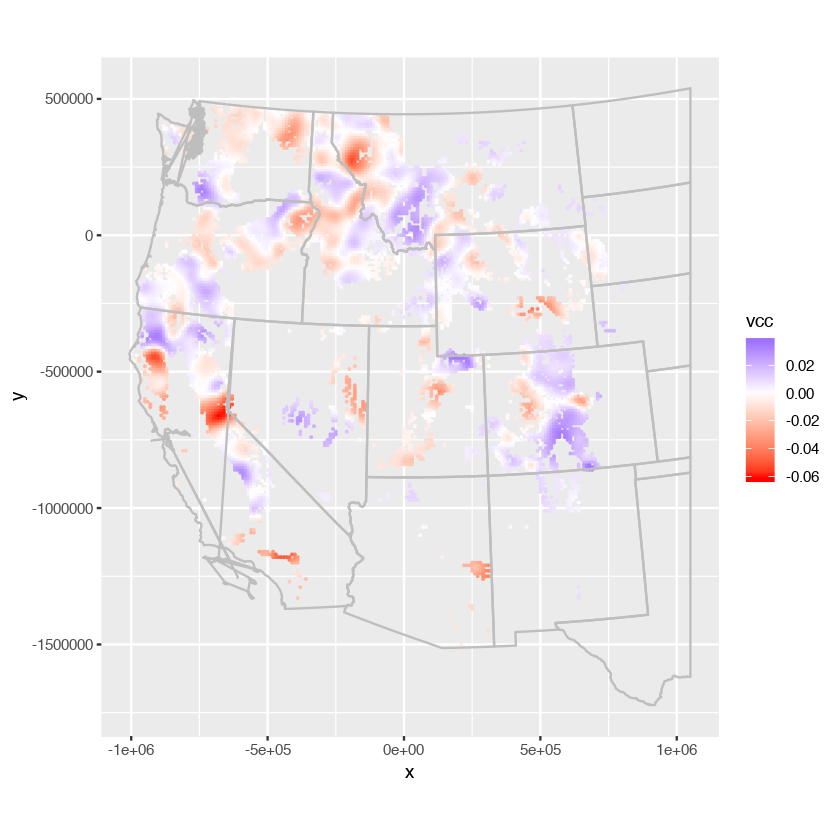

Warning message:
“Non Lab interpolation is deprecated”

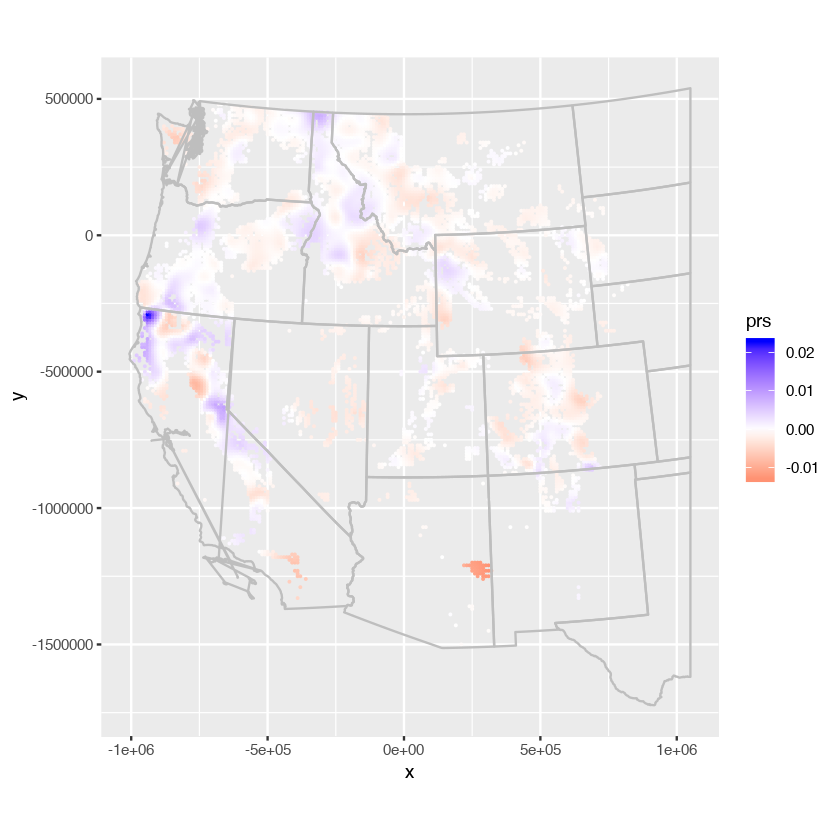

Warning message:
“Non Lab interpolation is deprecated”

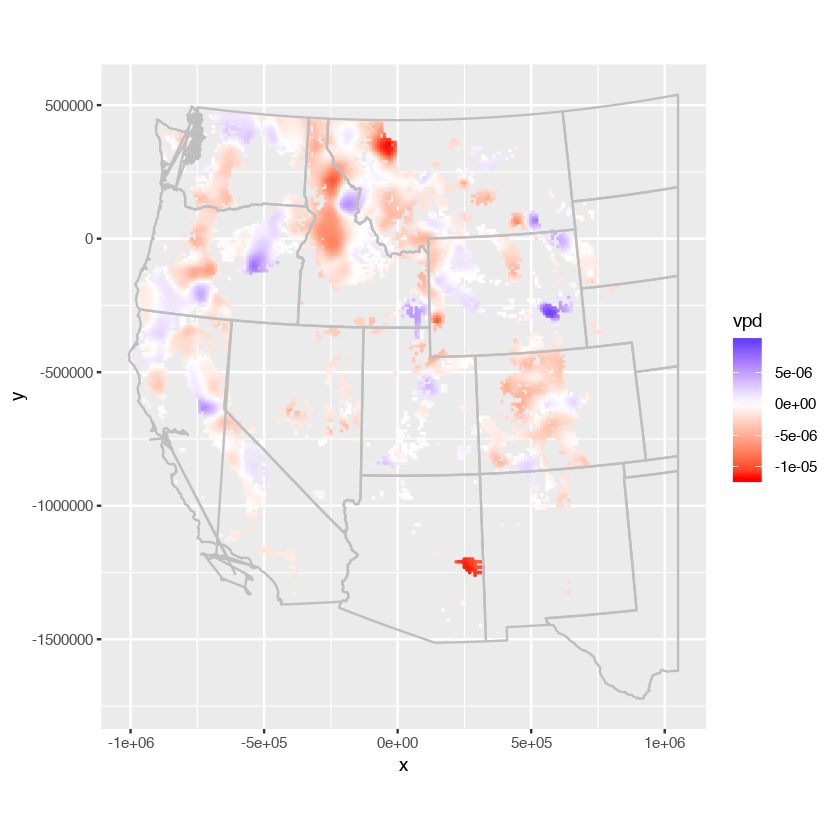

Warning message:
“Non Lab interpolation is deprecated”

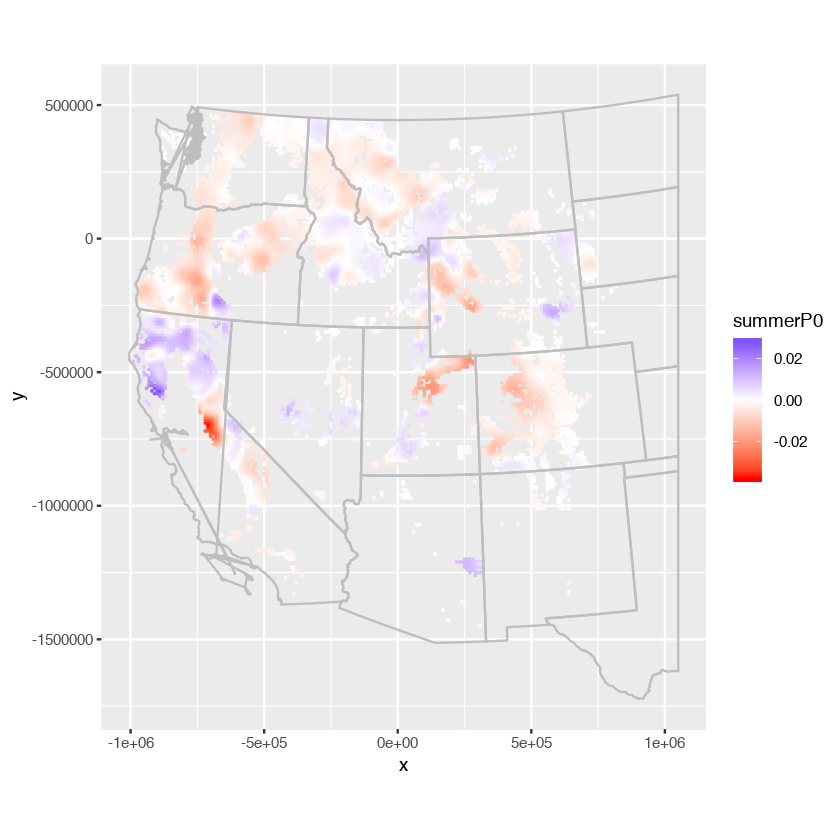

Warning message:
“Non Lab interpolation is deprecated”

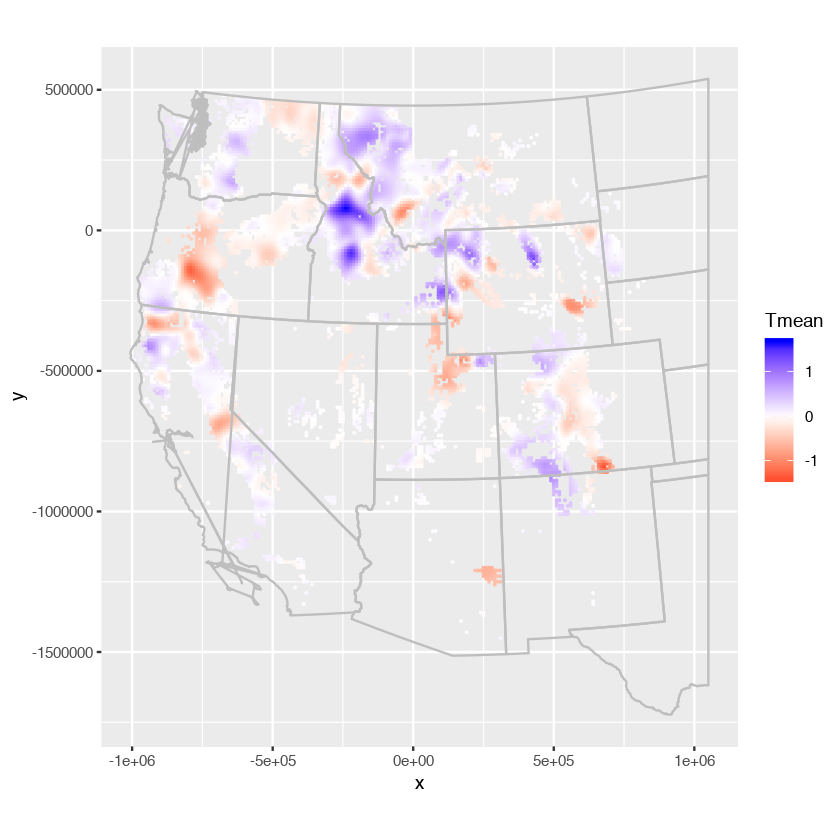

Warning message:
“Non Lab interpolation is deprecated”

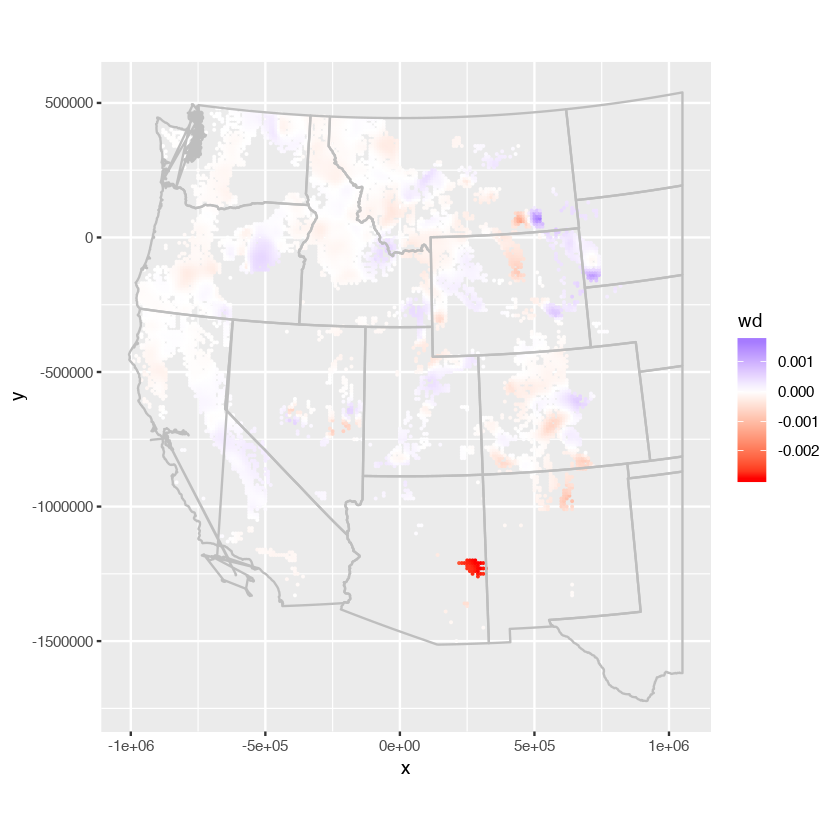

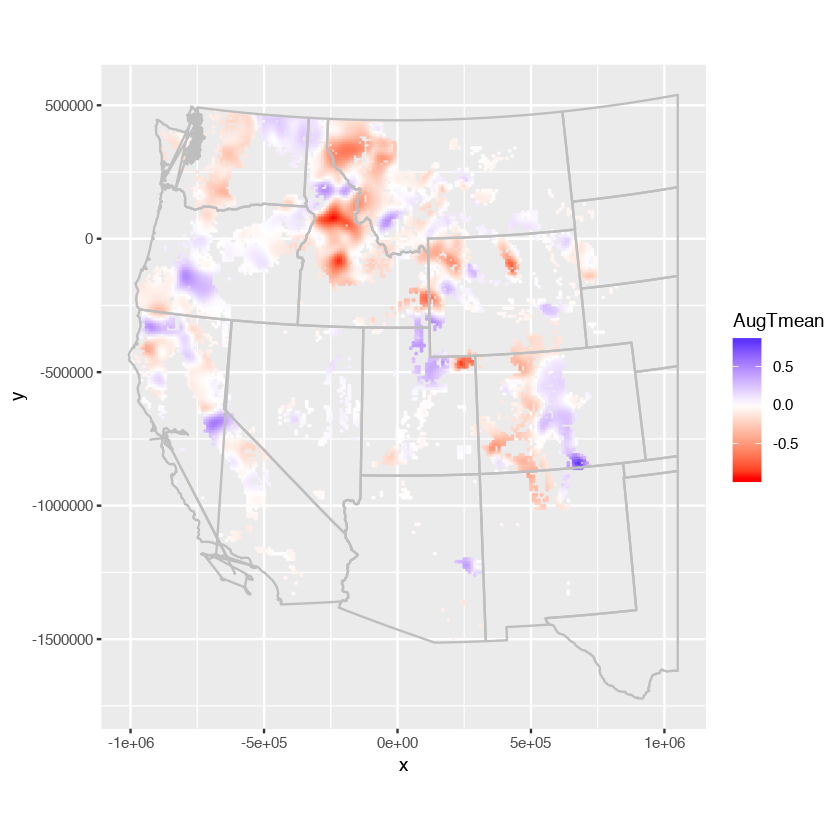

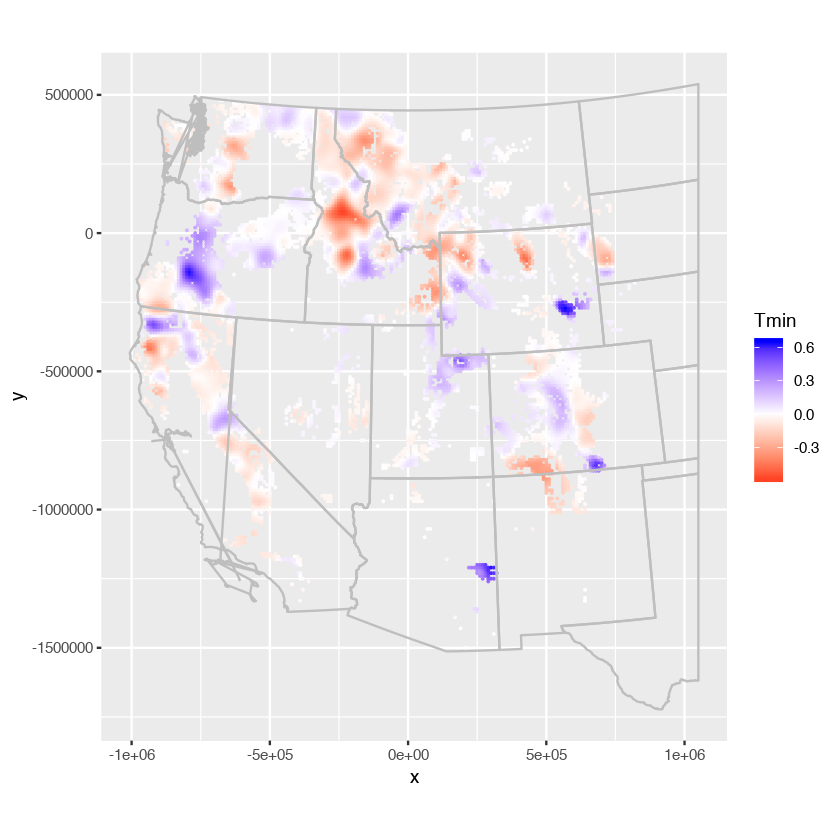

In [13]:
par(mfrow=c(1, 1))
for(v in coef.vars){
    gwr.pt <- ggplot(data.gwr, aes(x=x,y=y))+geom_point(aes(colour=results[,v]), size=0.05)+
  scale_colour_gradient2(low = "red", mid = "white", high = "blue", midpoint = 0, space = "rgb", 
                         na.value = "grey50", guide = "colourbar", guide_legend(title=v))
    print(gwr.pt+geom_path(data=mpb10km_lines,aes(long, lat, group=id), colour="grey")+coord_equal())
}

Warning message in classIntervals(plotvar, nclr, style = "equal"):
“n same as number of different finite values\neach different finite value is a separate class”

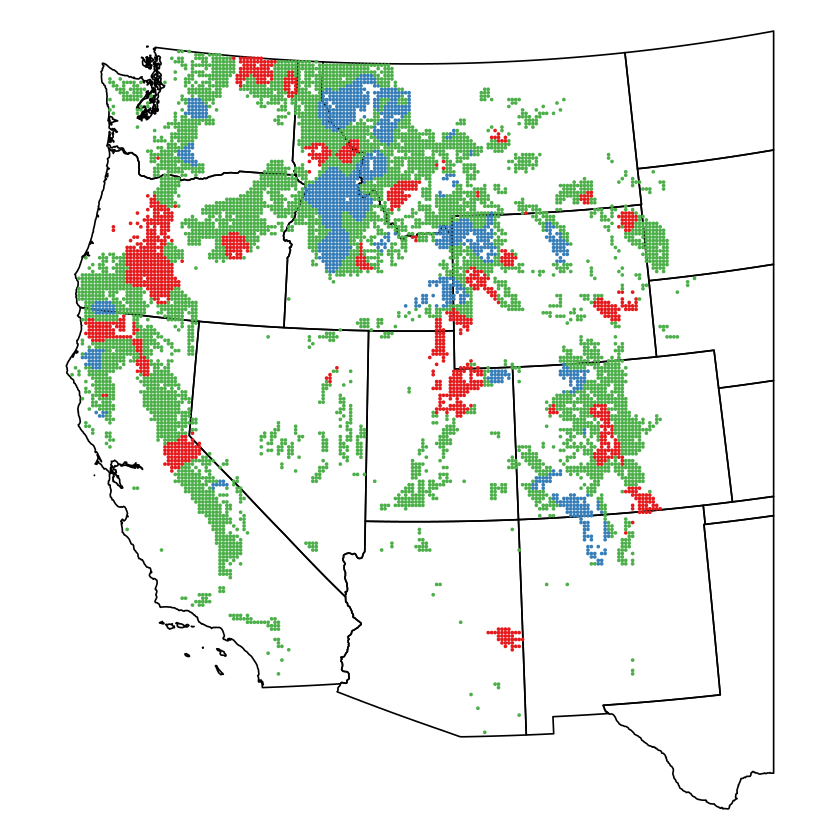

In [14]:
plotvar <- fit$cluster
class <- classIntervals(plotvar, nclr, style="equal")
colcode <- findColours(class, plotclr)
par(mfrow=c(1,1),mar=c(0,0,0,0))
plot(mpb10km_poly)
points(xy$x, xy$y, pch=16, col=colcode, cex=0.3)

In [15]:
coeffs.updated <- data.frame(coeffs, fit$cluster)

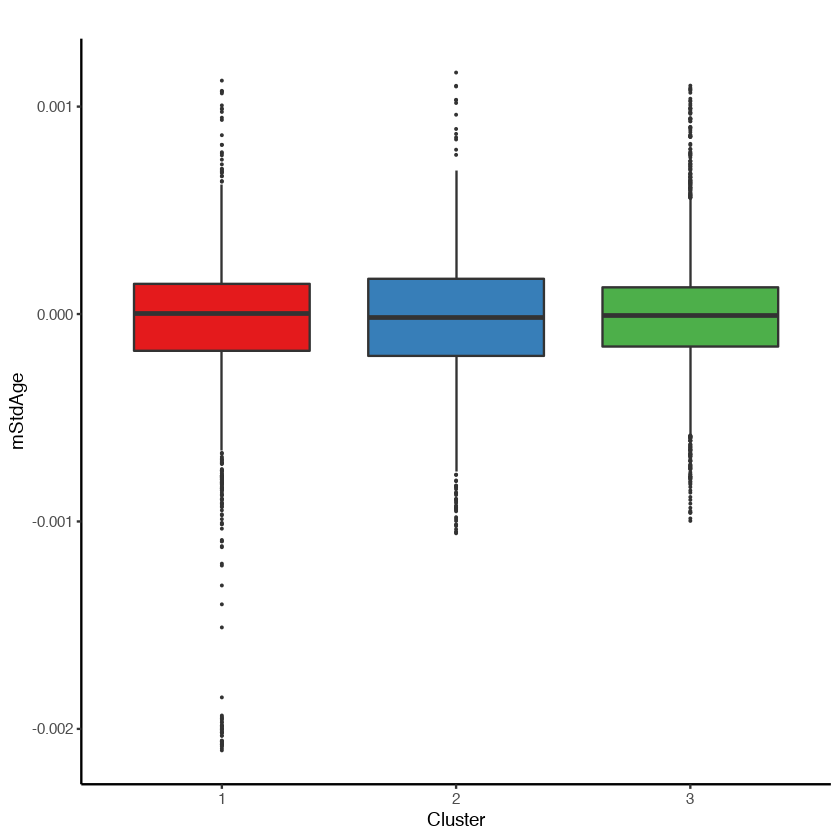

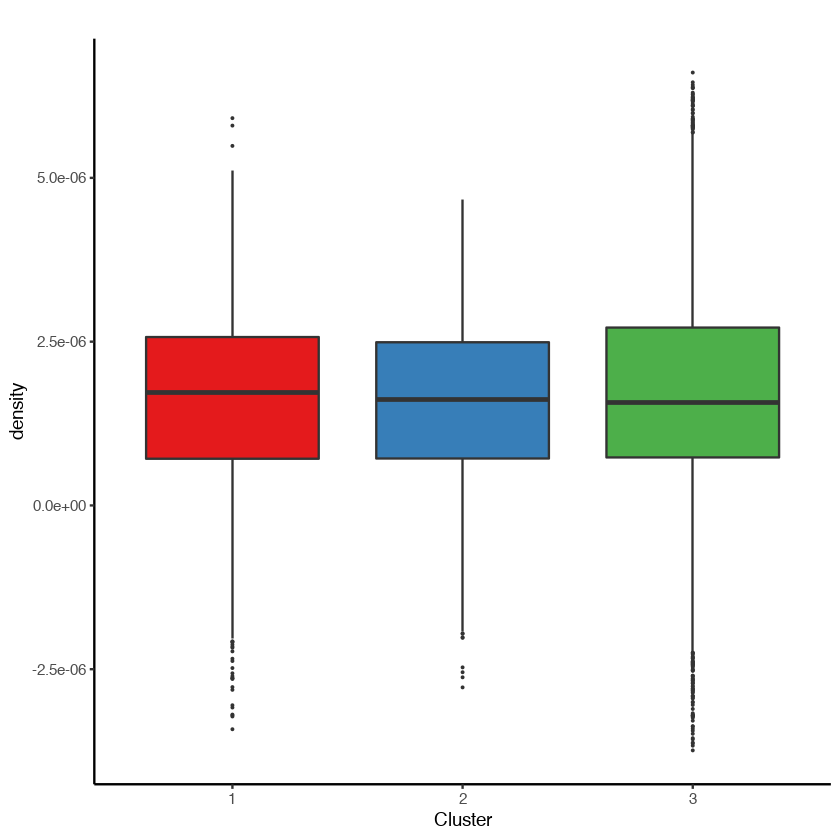

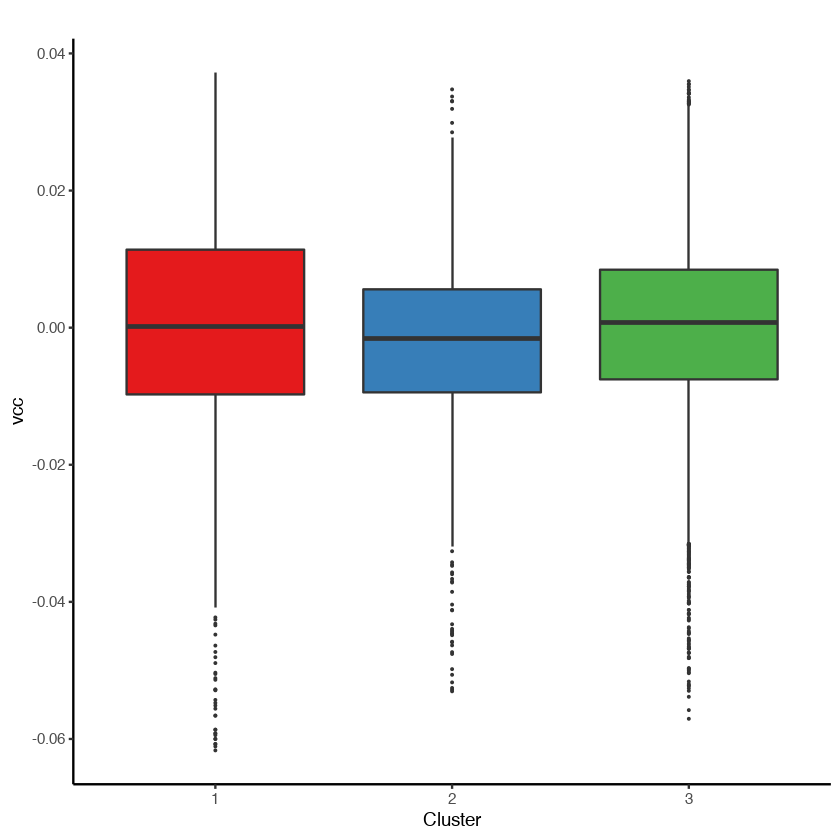

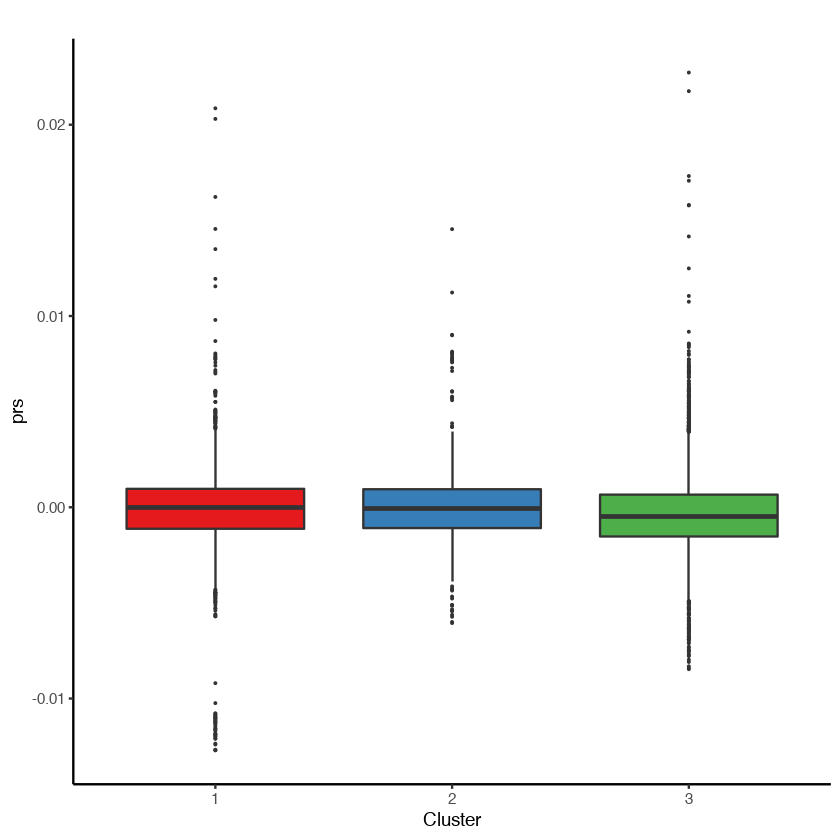

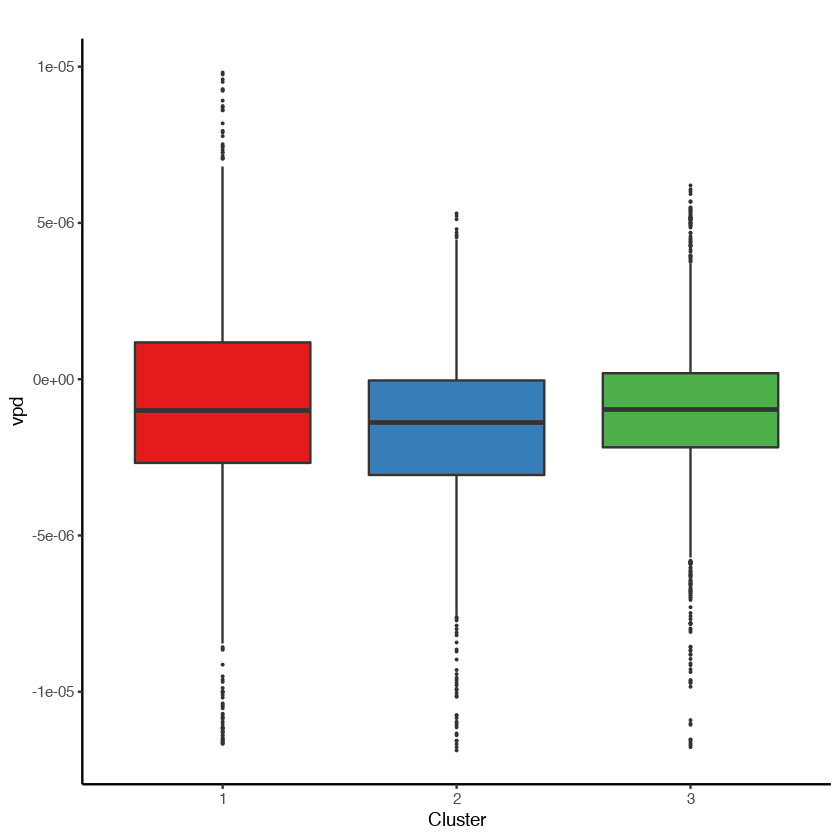

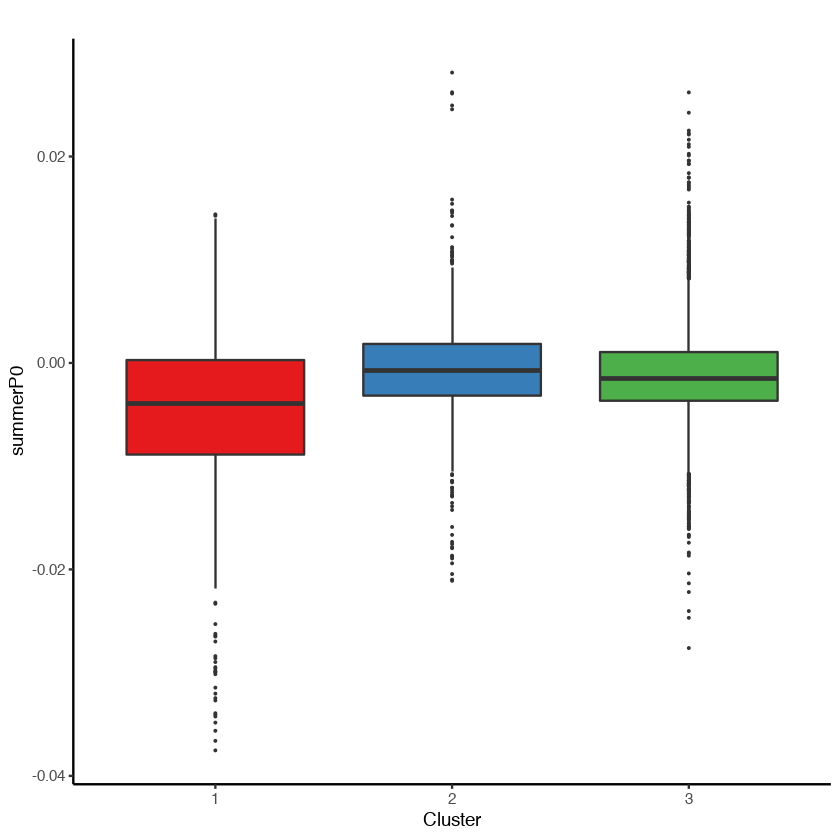

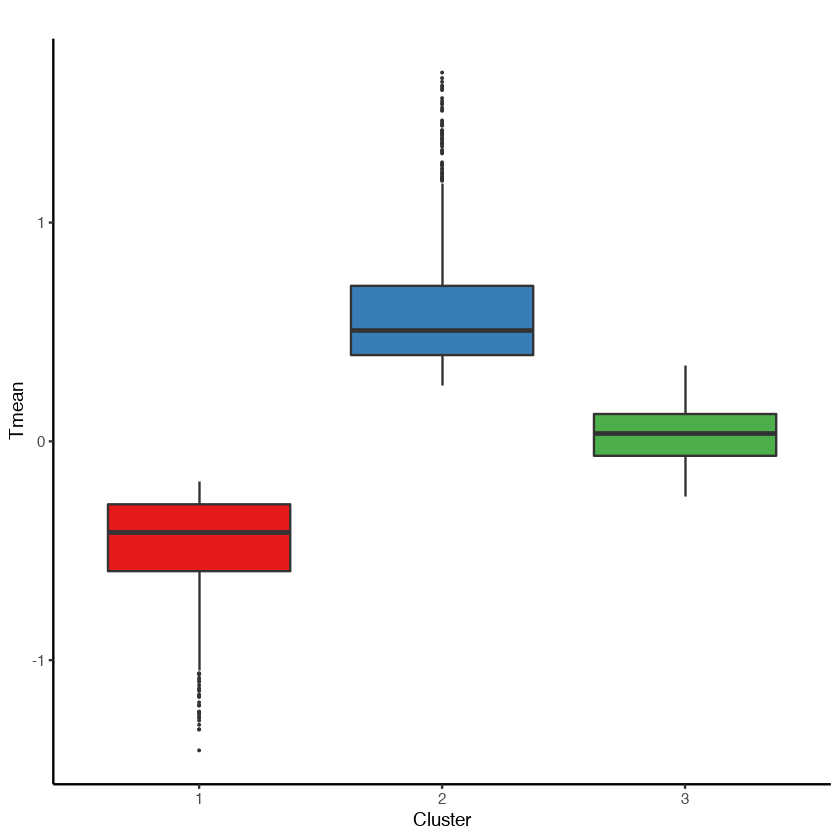

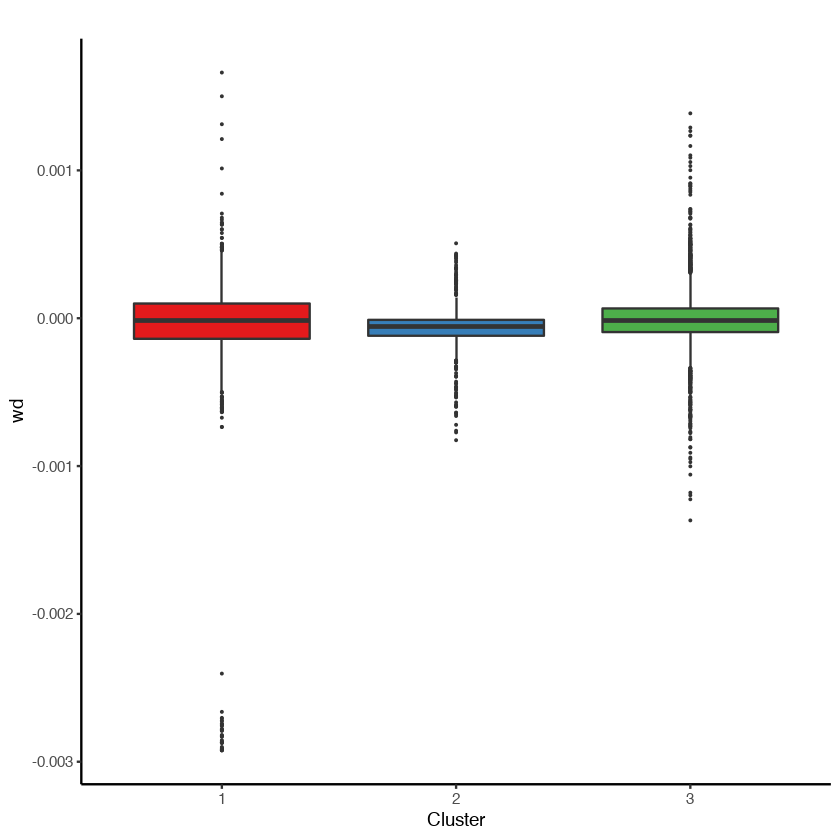

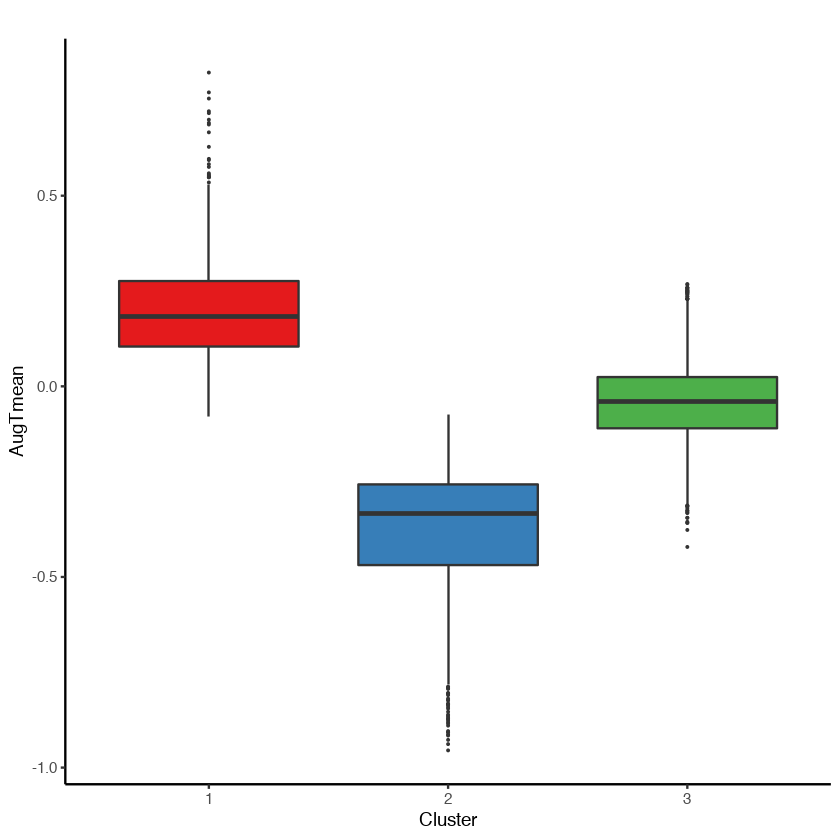

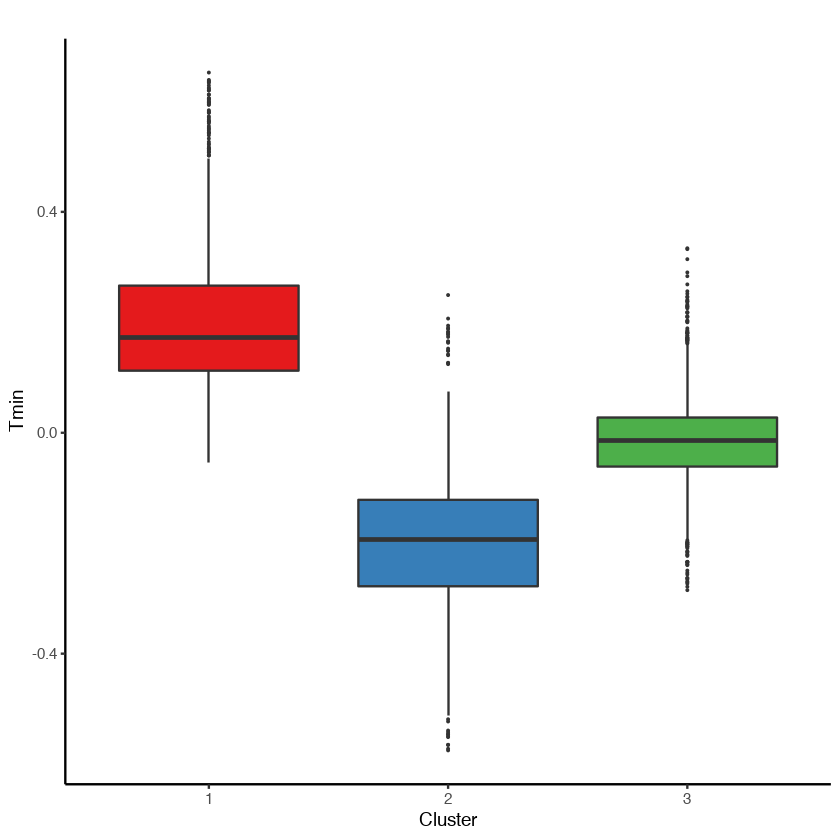

In [16]:
par(mfrow=c(1, 1))
for(v in coef.vars){
    sdf <- coeffs.updated[, c(v, 'fit.cluster')]
    colnames(sdf)[1] <- 'var'
    g <- ggplot(sdf, aes(x=as.factor(fit.cluster), y=var, fill=as.factor(fit.cluster)))+
      scale_fill_manual(values = plotclr) +
      geom_boxplot(outlier.size = 0.05)+labs(title='', x="Cluster", y = v)+
      theme_classic() + theme(legend.position="none") 
    i <- which(coef.vars==v)
    print(g)
}